<a href="https://colab.research.google.com/github/icaroluis4/python-forecasts/blob/main/DEMO_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalações

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


#Importações

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import tensorflow as tf

import yfinance as yf
import pandas_datareader.data as web

from numpy import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler # novo Scaler para TESTE-1_2 
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, LSTM , Dropout
from tensorflow.keras.layers import *
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

from google.colab import files #necessario para o upload do arquivo
import io #necessario para o upload do arquivo

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20 ,15

#Obtendo Dados 

In [ ]:
its4 = yf.Ticker("ITUB4.SA")

In [ ]:
hist = its4.history(start="2010-01-01" , end = "2019-12-12")

df = hist

df.head() , print(len(df))

2469


(                 Open       High        Low      Close    Volume  Dividends  \
 Date                                                                          
 2010-01-04  10.811475  11.256278  10.811475  11.153418  11843397        0.0   
 2010-01-05  11.181216  11.225697  11.092255  11.225697   8593315        0.0   
 2010-01-06  11.189554  11.256275  11.036654  11.128394  10602572        0.0   
 2010-01-07  11.050554  11.133955  10.994954  11.014415   9966567        0.0   
 2010-01-08  11.058899  11.058899  10.819818  10.847618   9748709        0.0   
 
             Stock Splits  
 Date                      
 2010-01-04           0.0  
 2010-01-05           0.0  
 2010-01-06           0.0  
 2010-01-07           0.0  
 2010-01-08           0.0  , None)

#Isolando a coluna 'Close' , separando os DataFrames de treino e teste

In [ ]:
df = df.iloc[: ,3:4]

df

,Close
Date,
2010-01-04,11.153418
2010-01-05,11.225697
2010-01-06,11.128394
2010-01-07,11.014415
2010-01-08,10.847618
...,...
2019-12-05,33.684460
2019-12-06,33.075542
2019-12-09,33.721371


#Dividindo Train & Test

In [ ]:


training_data = df[:2100]
testing_data = df[2101:]




df.shape, training_data.shape , testing_data.shape

((2469, 1), (2100, 1), (368, 1))

In [ ]:
 df.tail()

,Close
Date,
2019-12-05,33.684460
2019-12-06,33.075542
2019-12-09,33.721371
2019-12-10,33.232399
2019-12-11,32.844906


#Plotando treino e teste

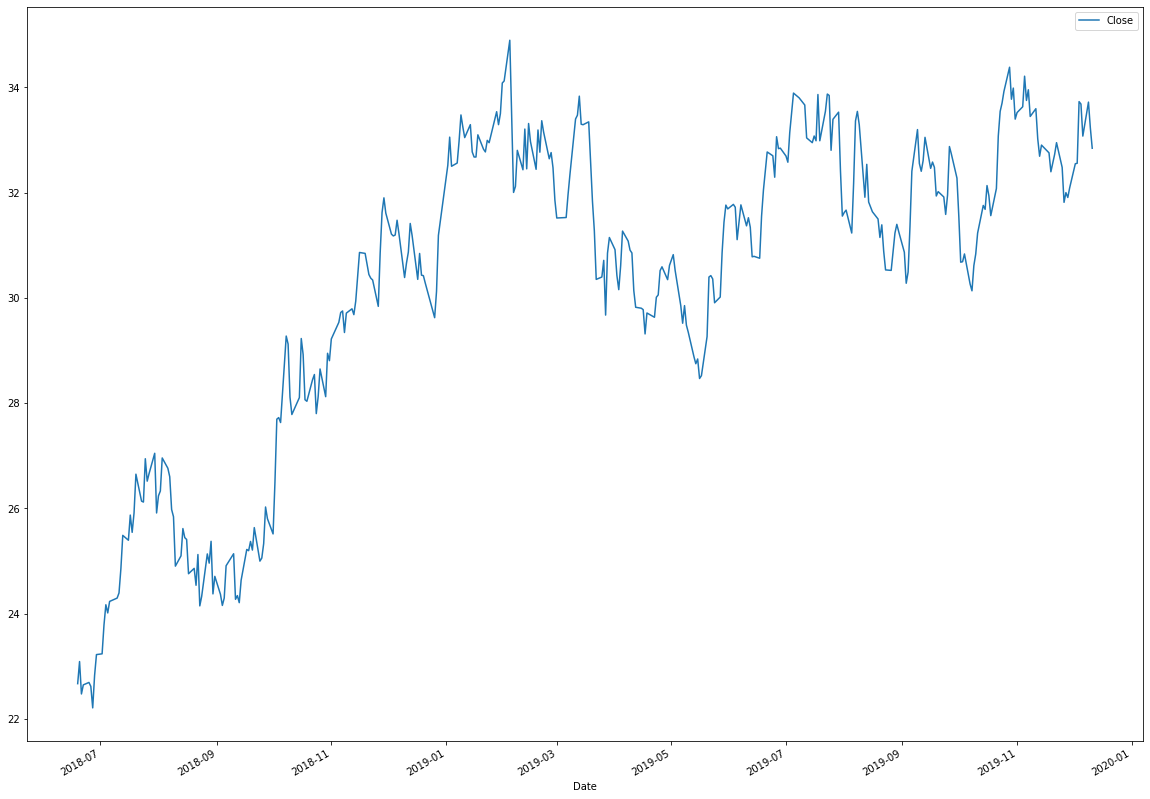

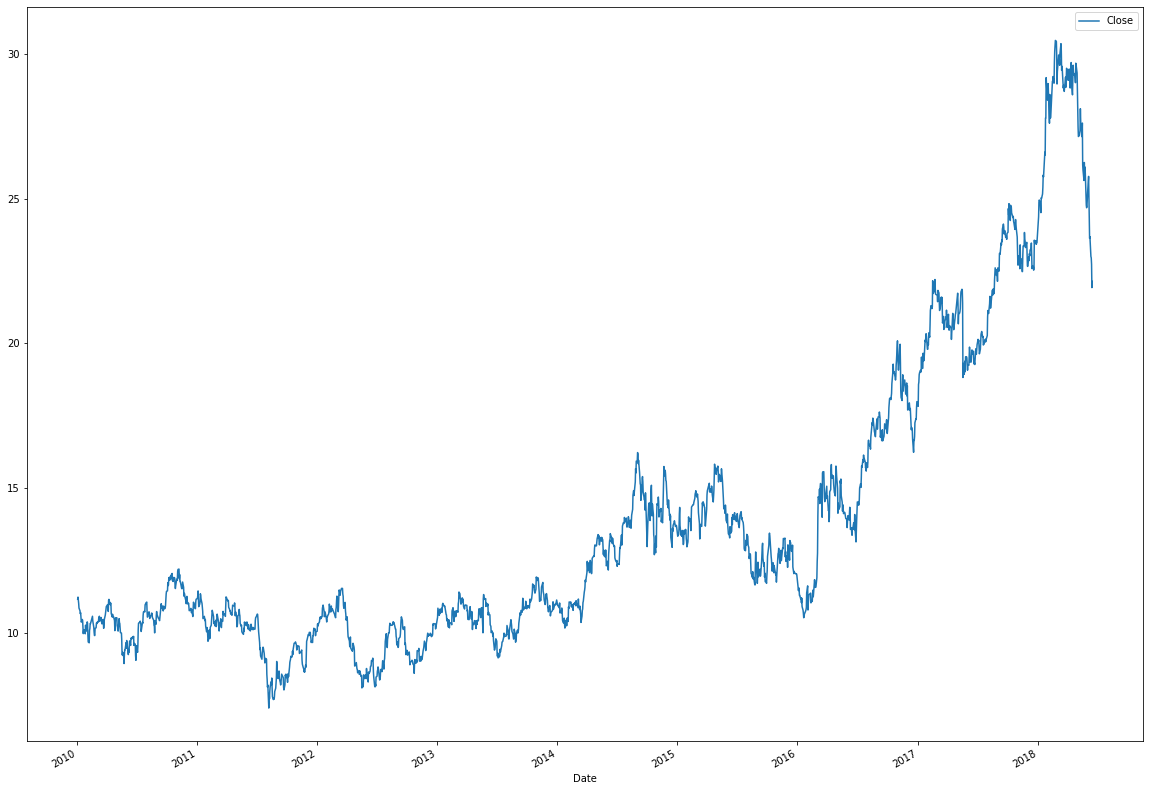

In [ ]:


testing_data.plot()
training_data.plot()

plt.show()

#Escalonando os dados entre 0 - 1

In [ ]:
print(training_data.shape,testing_data.shape)

(2100, 1) (368, 1)


In [ ]:


scaler = MinMaxScaler(feature_range=(0, 1))

training_data_scaled = scaler.fit_transform(training_data)
testing_data_scaled = scaler.fit_transform(testing_data)



training_data_scaled[44:1,0]



array([], dtype=float64)

#Função que distribui os dados para cada 'time' em X para Y

#Função, distribuindo os dias pela janela de tempo

In [ ]:
def create_df_hog(df , windows):
  #df_as_np = np.array(df)
  df = pd.DataFrame(df)
  df_as_np = df.to_numpy()

  print(len(df_as_np))

  X = []
  y = []

  for i in range (len(df_as_np) - windows):

    row =[[a] for a in df_as_np[ i : i + windows]]

    X.append(row)
    label = df_as_np[ i + windows]
    y.append(label)


  return np.array(X) , np.array(y)


In [ ]:
'''def create_df(df):

  x_df = []
  y_df = []

  time = 3
  #sum = 30
  length = len(df)

  for i in range(time , length):
       x_df.append(((df[i - time:i ,0])))
    
       y_df.append(df[i,0])

  x_df = np.array(x_df)
  y_df = np.array(y_df)

  return x_df, y_df'''

'def create_df(df):\n\n  x_df = []\n  y_df = []\n\n  time = 3\n  #sum = 30\n  length = len(df)\n\n  for i in range(time , length):\n       x_df.append(((df[i - time:i ,0])))\n    \n       y_df.append(df[i,0])\n\n  x_df = np.array(x_df)\n  y_df = np.array(y_df)\n\n  return x_df, y_df'

#Passando a função para os dados

In [ ]:
x_train , y_train = create_df_hog(training_data_scaled , 3) #training_data_scaled
x_test , y_test = create_df_hog(testing_data_scaled , 3) #testing_data_scaled

x_train.shape , y_train.shape , x_test.shape , y_test.shape

2100
368


((2097, 3, 1, 1), (2097, 1), (365, 3, 1, 1), (365, 1))

#Reshape para o formato do modelo

In [ ]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1))
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1 ))
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((2097, 3, 1), (2097, 1), (365, 3, 1), (365, 1))

Trasnformando y_train e y_test

In [ ]:
def transform_y( df):
  aux = []
  aux2 = 0
  for i in range (len(df)) :
      aux2 = df[i][0]
      aux.append(aux2)

  return np.array(aux)



In [ ]:
y_train = transform_y(y_train)
y_test = transform_y(y_test)

x_train.shape , y_train.shape , x_test.shape , y_test.shape


((2097, 3, 1), (2097,), (365, 3, 1), (365,))

In [ ]:
print(x_train.shape[1])

3


#Modelo

In [ ]:
#from tensorflow.keras.layers import *

model = Sequential()

model.add(InputLayer((3 , 1)))

model.add(LSTM(units = 128 , return_sequences = True ))
model.add(Dropout(0.2))

model.add(LSTM(64))

model.add(Dense(8 , 'relu'))

model.add(Dense(1 , 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 3, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 116,497
Trainable params: 116,497
Non-trainable params: 0
_________________________________________________________________


#Compilando o modelo

In [ ]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

#Treino do modelo

In [ ]:
model.fit(x_train , y_train , epochs = 50 , batch_size = 1 , verbose = 1)

Epoch 1/50
2097/2097 [==============================] - 25s 10ms/step - loss: 0.0022
Epoch 2/50
2097/2097 [==============================] - 12s 6ms/step - loss: 8.3510e-04
Epoch 3/50
2097/2097 [==============================] - 13s 6ms/step - loss: 8.0643e-04
Epoch 4/50
2097/2097 [==============================] - 12s 6ms/step - loss: 7.0268e-04
Epoch 5/50
2097/2097 [==============================] - 12s 6ms/step - loss: 6.4832e-04
Epoch 6/50
2097/2097 [==============================] - 12s 6ms/step - loss: 6.8042e-04
Epoch 7/50
2097/2097 [==============================] - 11s 5ms/step - loss: 5.7639e-04
Epoch 8/50
2097/2097 [==============================] - 13s 6ms/step - loss: 5.8314e-04
Epoch 9/50
2097/2097 [==============================] - 12s 6ms/step - loss: 5.0453e-04
Epoch 10/50
2097/2097 [==============================] - 12s 6ms/step - loss: 5.0456e-04
Epoch 11/50
2097/2097 [==============================] - 12s 6ms/step - loss: 4.6260e-04
Epoch 12/50
2097/2097 [==========

#Predição

In [ ]:
#prev = model.predict(x_test , batch_size = 1)
prev = model.predict(x_test)
prev.shape

(365, 1)

In [ ]:
print(prev[0])

[0.04481078]


#Desfazendo o escalonamento

#Caso shape seja (1)

In [ ]:
prev2 = []
aux = 0;
#prev.eval()
for x in range(len(prev)): #Anterior prev agora vect
  aux = prev[x] #(84,15,1) -- ESTÁ PEGANDO O ULTIMO DO VETOR [-1]
  aux = aux.reshape(-1 , 1)
  
  prev2.append(scaler.inverse_transform(aux))
  #prev2.append(aux)

prev2

[array([[22.775675]], dtype=float32),
 array([[22.746964]], dtype=float32),
 array([[22.71976]], dtype=float32),
 array([[22.702673]], dtype=float32),
 array([[22.591776]], dtype=float32),
 array([[22.750252]], dtype=float32),
 array([[23.047686]], dtype=float32),
 array([[23.206837]], dtype=float32),
 array([[23.684322]], dtype=float32),
 array([[24.026552]], dtype=float32),
 array([[24.03391]], dtype=float32),
 array([[24.261873]], dtype=float32),
 array([[24.281298]], dtype=float32),
 array([[24.399092]], dtype=float32),
 array([[24.800697]], dtype=float32),
 array([[25.334906]], dtype=float32),
 array([[25.332565]], dtype=float32),
 array([[25.854202]], dtype=float32),
 array([[25.540834]], dtype=float32),
 array([[25.942028]], dtype=float32),
 array([[26.51454]], dtype=float32),
 array([[26.12832]], dtype=float32),
 array([[26.18585]], dtype=float32),
 array([[26.88926]], dtype=float32),
 array([[26.476978]], dtype=float32),
 array([[26.699442]], dtype=float32),
 array([[26.987234

Shape > 1

In [ ]:
'''
prev2 = []
aux = 0;
#prev.eval()
for x in range(len(prev)): #Anterior prev agora vect
  aux = prev[x][-1] #(84,15,1) -- ESTÁ PEGANDO O ULTIMO DO VETOR [-1]
  aux = aux.reshape(-1 , 1)
  
  prev2.append(scaler.inverse_transform(aux))
  #prev2.append(aux)

prev2 '''

'\nprev2 = []\naux = 0;\n#prev.eval()\nfor x in range(len(prev)): #Anterior prev agora vect\n  aux = prev[x][-1] #(84,15,1) -- ESTÁ PEGANDO O ULTIMO DO VETOR [-1]\n  aux = aux.reshape(-1 , 1)\n  \n  prev2.append(scaler.inverse_transform(aux))\n  #prev2.append(aux)\n\nprev2 '

Retirando dados dos vetores internos

In [ ]:
#prev2 = prev
prev3 = []
for x in range(len(prev2)):
  prev3.append(prev2[x][0][0])

prev3

[22.775675,
 22.746964,
 22.71976,
 22.702673,
 22.591776,
 22.750252,
 23.047686,
 23.206837,
 23.684322,
 24.026552,
 24.03391,
 24.261873,
 24.281298,
 24.399092,
 24.800697,
 25.334906,
 25.332565,
 25.854202,
 25.540834,
 25.942028,
 26.51454,
 26.12832,
 26.18585,
 26.88926,
 26.476978,
 26.699442,
 26.987234,
 26.07447,
 26.366735,
 26.267796,
 26.889359,
 26.70279,
 26.63774,
 26.078743,
 25.934994,
 25.103703,
 25.268734,
 25.536758,
 25.409224,
 25.451576,
 24.902256,
 24.993683,
 24.61415,
 25.166939,
 24.38082,
 24.552431,
 25.028177,
 24.913862,
 25.385094,
 24.597717,
 24.922375,
 24.42726,
 24.287962,
 24.349838,
 24.828928,
 25.02231,
 24.47641,
 24.542793,
 24.259546,
 24.6398,
 25.07898,
 25.132175,
 25.370188,
 25.222855,
 25.637342,
 25.085812,
 25.179214,
 25.30495,
 25.913769,
 25.748299,
 25.587896,
 26.511198,
 27.384188,
 27.560392,
 27.662872,
 29.098692,
 28.875923,
 28.316372,
 27.931902,
 28.112377,
 29.010408,
 28.81266,
 28.246414,
 28.131168,
 28.391382,

#Unindo as colunas de Teste(close) e Previsão

Verificando o type de prev3 & testing_data

In [ ]:
print(type(prev3) , type(testing_data))

<class 'list'> <class 'pandas.core.frame.DataFrame'>


Vetificando o Shape de prev3 & testing_data antes de adcionar a coluna(prev3) , precisam ter a msma indexação 

In [ ]:
print(len(prev3) , testing_data.shape)

365 (368, 1)


In [ ]:
print(testing_data)

                Close
Date                 
2018-06-19  22.667498
2018-06-20  23.087698
2018-06-21  22.471785
2018-06-22  22.644464
2018-06-25  22.690521
...               ...
2019-12-05  33.684460
2019-12-06  33.075542
2019-12-09  33.721371
2019-12-10  33.232399
2019-12-11  32.844906

[368 rows x 1 columns]


Verificando o index das datas

In [ ]:
datas = []

#for i in range(3):
#  datas = testing_data['Date'][i]

index = testing_data.index
print(index[3 :])

DatetimeIndex(['2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29', '2018-07-02', '2018-07-03',
               '2018-07-04', '2018-07-05',
               ...
               '2019-11-28', '2019-11-29', '2019-12-02', '2019-12-03',
               '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-09',
               '2019-12-10', '2019-12-11'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)


Dropando/excluido primeira linha do DF

In [ ]:
resultado = testing_data.drop( testing_data.index[0 : 3] , axis = 0)

In [ ]:
print(resultado)

                Close
Date                 
2018-06-22  22.644464
2018-06-25  22.690521
2018-06-26  22.615686
2018-06-27  22.207012
2018-06-28  22.822914
...               ...
2019-12-05  33.684460
2019-12-06  33.075542
2019-12-09  33.721371
2019-12-10  33.232399
2019-12-11  32.844906

[365 rows x 1 columns]


Jogando prev para o msm DATA FRAME que testing_data

In [ ]:
resultado['previsão'] = prev3

In [ ]:
print(resultado)

                Close   previsão
Date                            
2018-06-22  22.644464  22.775675
2018-06-25  22.690521  22.746964
2018-06-26  22.615686  22.719761
2018-06-27  22.207012  22.702673
2018-06-28  22.822914  22.591776
...               ...        ...
2019-12-05  33.684460  33.525913
2019-12-06  33.075542  33.508442
2019-12-09  33.721371  33.338387
2019-12-10  33.232399  33.770889
2019-12-11  32.844906  33.316971

[365 rows x 2 columns]


#PLOTAGEM

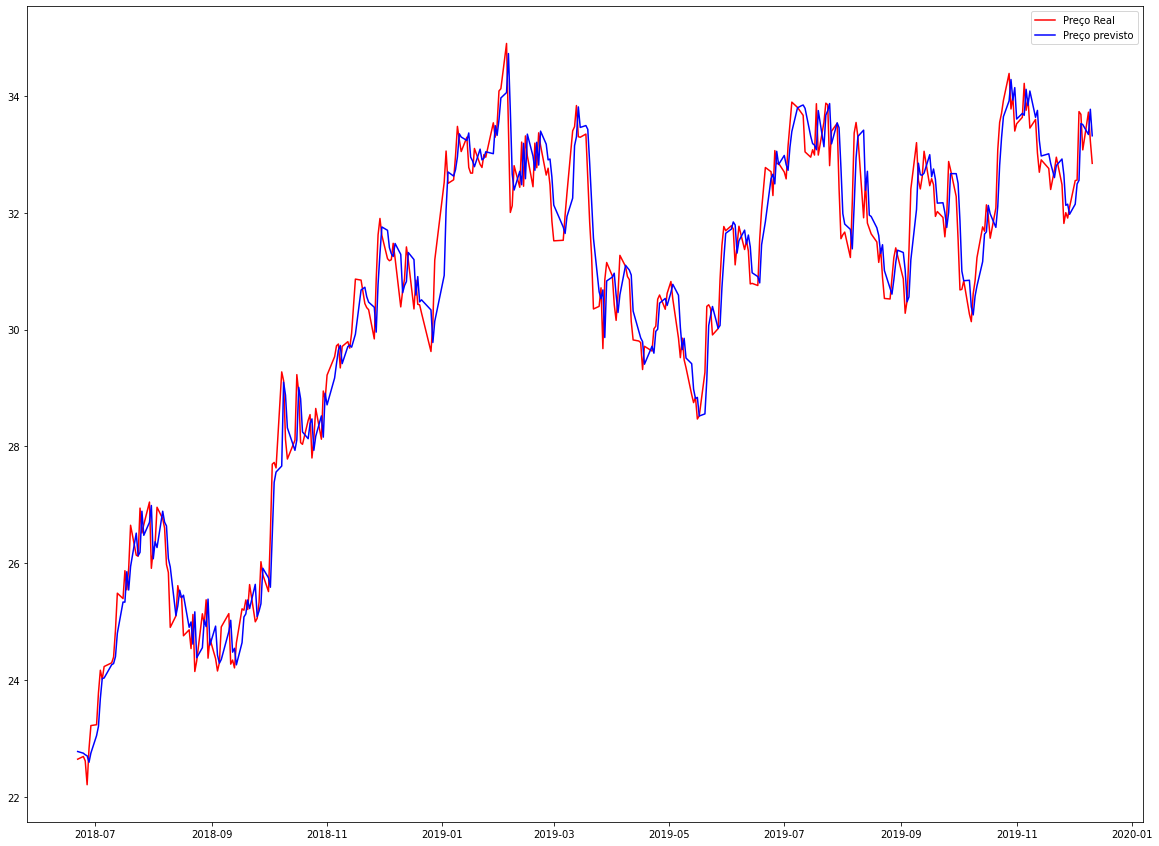

In [ ]:
#testing_data = testing_data['Close'].values

#plt.plot(prev3 , color = 'blue' , label = 'Preço Previsto' )
plt.plot(resultado['Close'] , color = 'red' , label = 'Preço Real')
plt.plot(resultado['previsão'] , color = 'blue' , label = 'Preço previsto' )

plt.legend()
plt.show()

Avaliar mean_squared_error

In [ ]:
rmse = sqrt(mean_squared_error(resultado['Close'],resultado['previsão']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.525


Dropar coluna previsão

In [ ]:
'''resultado.drop('previsão' , axis =1 , inplace= True )

print(testing_data)'''

"resultado.drop('previsão' , axis =1 , inplace= True )\n\nprint(testing_data)"

# Fechamento dia RESULTADO

In [ ]:
cash = 100.0
min = 100.0
max = 100.0

close = 0
prev = 0

putcall = False
longshort = False

acertos = 0
erros = 0

lucroperda = 0

df3 = resultado

#prev = df['Close'][0] - df['previsão'][1]
#print(prev)


for x in range(len(df)):
    
    putcall = False
    longshort = False

    if( x+1 == len(df3)):
        break
    else:
        close = df3['Close'][x]
        prev = df3['previsão'][x+1]
        if(prev > close):
            putcall = True
        else:
            putcall = False

        lucroperda =  abs(df3['Close'][x] - df3['Close'][x+1])

        if(df3['Close'][x] < df3['Close'][x+1]):
            longshort = True
        else:
            longshort = False
        
        if(longshort != putcall):
            cash = cash - lucroperda 
            erros = erros + 1
            if(cash < min):
                min = cash
        else:
            cash = cash + lucroperda 
            acertos = acertos + 1
            if(cash > max):
                max = cash
        


print(cash)
print("Total:" , len(df3) , " Acertos: ", acertos , " Erros: " , erros , " MAX: " , max , " MIN: ", min )
print("Valorização Buy and Hold" , df3['Close'][0] , " --- " , df3['Close'].iloc[-1]) 

107.80282783508301
Total: 365  Acertos:  194  Erros:  170  MAX:  116.48112678527832  MIN:  98.5749740600586
Valorização Buy and Hold 22.64446449279785  ---  32.844905853271484


# CSV

In [ ]:
resultado.to_csv('itau_LSTM_50ep.csv')